In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

In [2]:
donnees = pd.read_csv("nettoyage.csv", delimiter="\t")
df = donnees.copy()

In [3]:
df.describe()

,energy_100g,fat_100g,saturated-fat_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,fruits-vegetables-nuts_100g,nova_group
count,7.085670e+05,708567.000000,708567.000000,708567.000000,708567.000000,708567.000000,708567.000000,708567.000000,204066.000000
mean,9.407098e+36,6.970110,2.534801,3.741615,0.514066,6.322848,1.101087,0.109826,3.522708
std,7.918558e+39,11.761992,4.959851,6.819413,2.159934,9.401297,4.834041,2.260059,0.877567
min,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
50%,3.800000e+02,1.000000,0.100000,0.700000,0.000000,1.900000,0.100000,0.000000,4.000000
75%,1.046000e+03,9.380000,2.500000,4.100000,0.000000,9.843000,1.150620,0.000000,4.000000
max,6.665559e+42,100.000000,93.100000,100.000000,100.000000,100.000000,100.000000,100.000000,4.000000


In [4]:
def distribution(feature, data=df):
    dist = data[feature].value_counts()
    d = pd.DataFrame(dist.index, columns=[feature])
    d["effectifs"] = dist.values
    d["frequences"] = dist.values/len(data)
    d["frequences cumulees"] = d["frequences"].cumsum()
    return d

In [5]:
distribution('brands')

,brands,effectifs,frequences,frequences cumulees
0,,300761,0.424464,0.424464
1,carrefour,7566,0.010678,0.435142
2,auchan,6362,0.008979,0.444120
3,u,3901,0.005505,0.449626
4,delhaiz,3114,0.004395,0.454021
5,lead pric,2996,0.004228,0.458249
6,casino,2717,0.003834,0.462083
7,cor,2190,0.003091,0.465174
8,nestl,2188,0.003088,0.468262
9,hacendado,2037,0.002875,0.471137


In [34]:
import seaborn as sns
#Affiche le distribution graphique d'une variable quantitative
def dist_graph(feature, data=df):
    sns.set()
    if data[feature].dtype == "float":
        sns.distplot(data[data[feature] != 0][feature])#On ignore la valeur 0

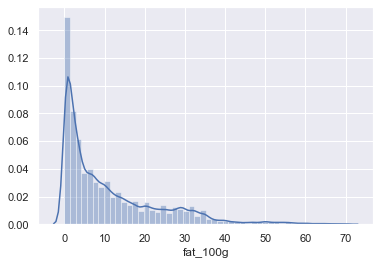

In [36]:
#d_nova = df[df['nova_group'].notna()]
dist_graph('fat_100g')

In [8]:
#boites à moustaches variable quantitative
sns.set()
def data_pai_plot(list_feature, data=df):
    d = pd.DataFrame()
    for f in list_feature:
        if data[f].dtype == "float":
            d[f] = data[data[f] != 0][f] #ignorer la valeur 0 dominante
    sns.boxplot(data=d, palette="colorblind", orient="h")

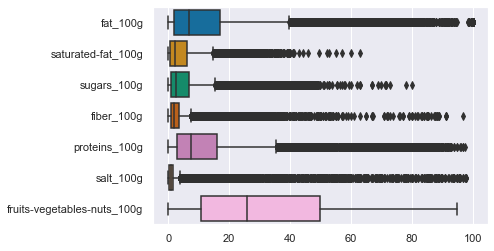

In [9]:
fs = ['fat_100g','saturated-fat_100g','sugars_100g','fiber_100g',
      'proteins_100g', 'salt_100g','fruits-vegetables-nuts_100g']

data_pai_plot(fs)

In [10]:
#variable qualitative
def pie_chart_qual(features, data=df):
    fig, axes = plt.subplots(nrows=1, ncols=len(features), figsize=(15, 4))
    i = 0
    for f in features:
        labels = []
        sizes = list(df[f].value_counts().sort_index())
        explode = [0] * len(sizes)
        explode[sizes.index(max(sizes))] = 0.1
        if f == "nutrition_grade_fr":
            cs = ["green", "lime", "yellow", "orange", "red"]
            labels = ["a", "b", "c", "d", "e"]
        if f == "nova_group":
            cs = ["lime", "yellow", "orange", "red"]
            labels = ["1", "2", "3", "4"]
        axes[i].pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90, colors=cs)
        i = i + 1
    j = 0
    for ax in axes:
        ax.axis('equal')
        ax.set_xlabel(features[j])
        j = j + 1
    plt.show()

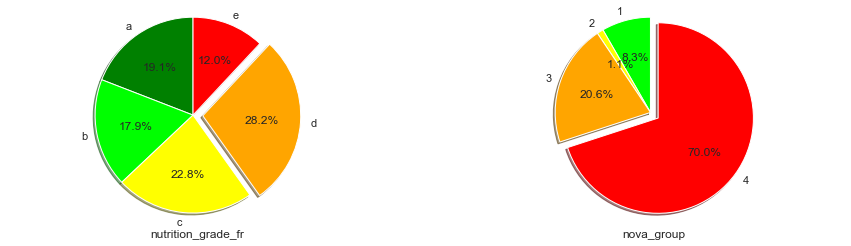

In [11]:
features_qual_pert_vis = ["nutrition_grade_fr", "nova_group"]
pie_chart_qual(features_qual_pert_vis)

In [12]:
#corrélation linéaire variables quantitatives
#pairplot
sns.set(style="ticks", color_codes=True)
def data_pair_plot(data=df):
    vars_quantitative = []
    for f in list(data.columns):
        if data[f].dtype == "float" and f != "nova_group":
            vars_quantitative.append(f)
    g = sns.pairplot(data, vars=vars_quantitative, hue="nutrition_grade_fr", palette={"a":"green", "b":"lime", "c":"yellow",
                                                                                      "d":"orange", "e":"red"})

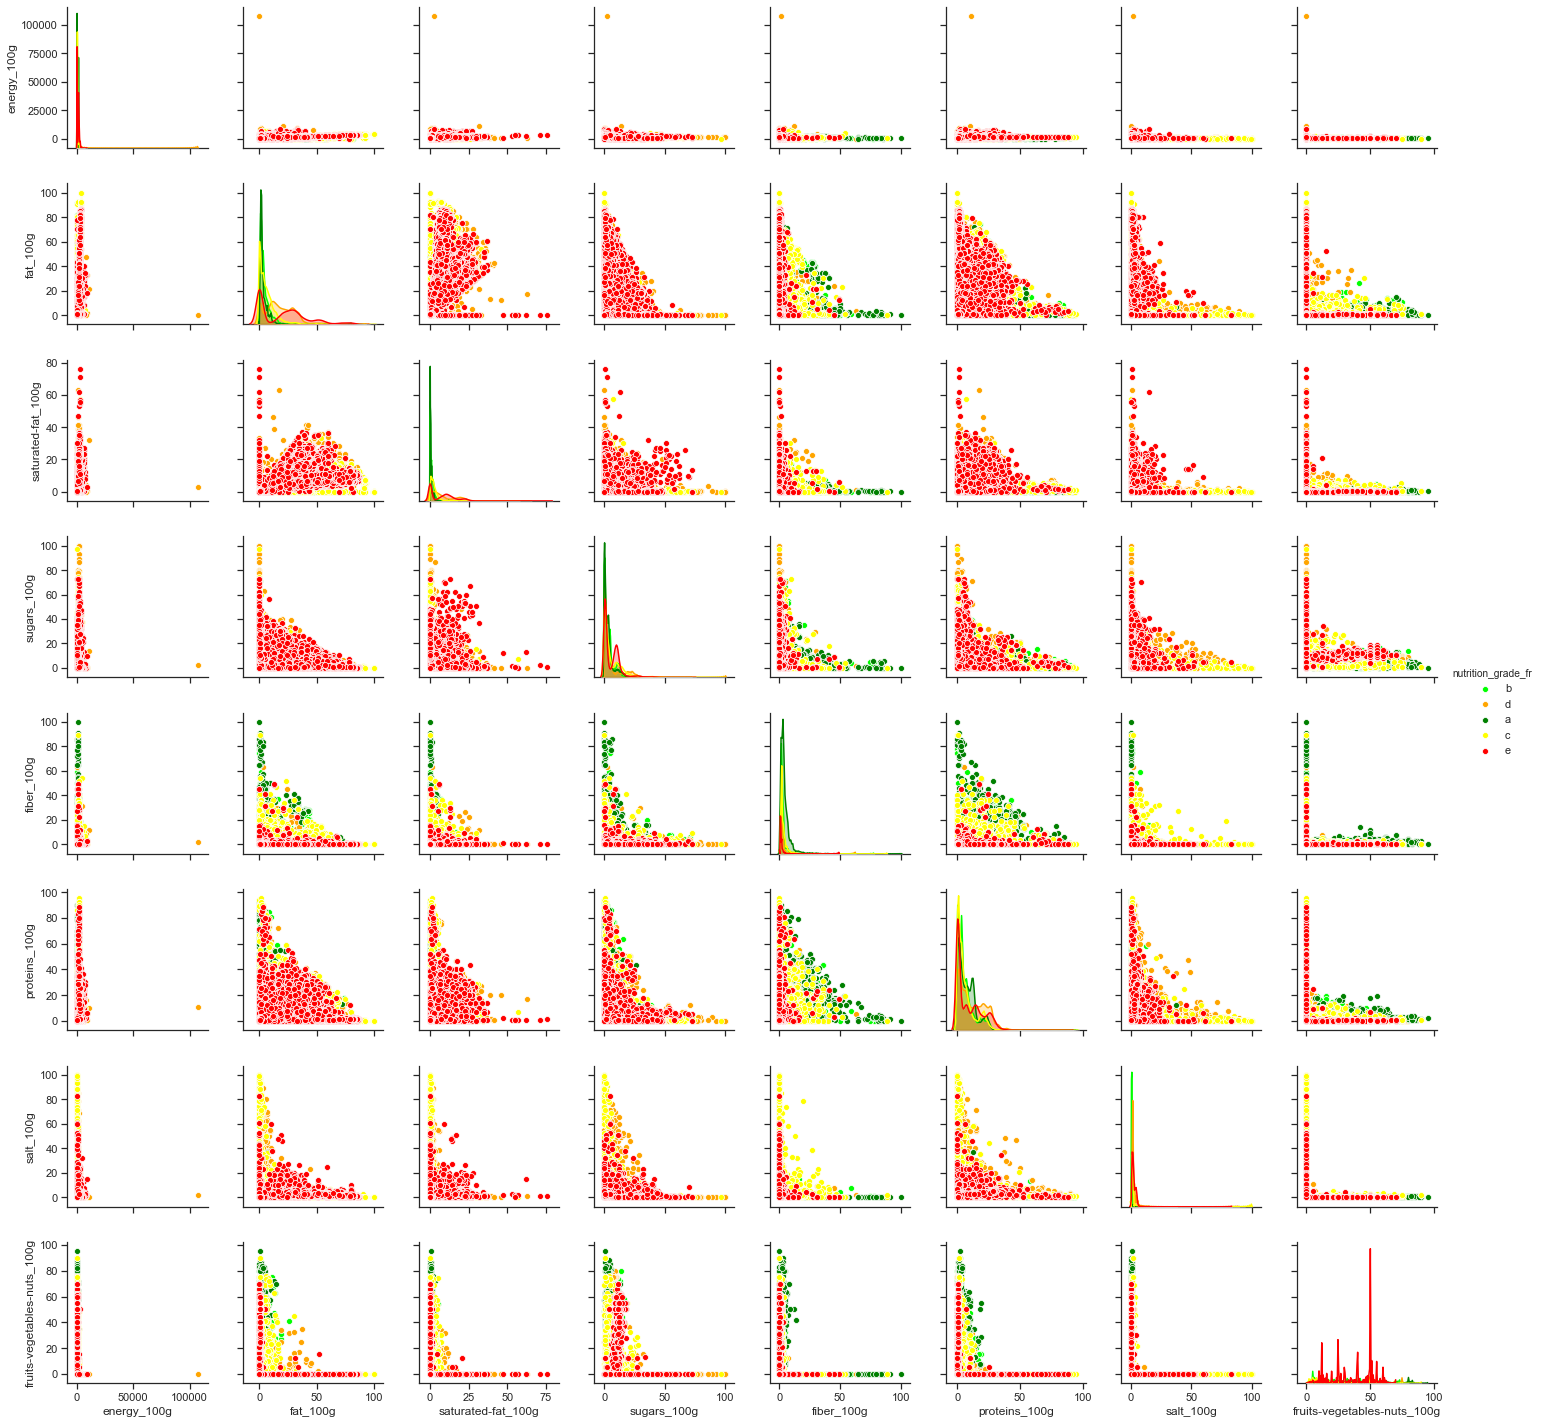

In [13]:
data_pair_plot()

In [14]:
#variables quantitatives, variable qualitative=nutri-grade
def anova(Y, quants, data=df):
    fig, axes = plt.subplots(nrows=1, ncols=len(quants), figsize=(15, 4))
    sous_echan = data[data[Y].notnull()]
    modalites = list(sous_echan[Y].unique())
    modalites.sort(reverse=True)
    cs = ["red", "orange", "yellow", "lime", "green"]
    i = 0
    for X in quants:
        if X == "nova_group":
            sous_echan = sous_echan[sous_echan[X].notnull()]
        else:
            sous_echan = sous_echan[sous_echan[X] != 0]
        groupes = []
        for m in modalites:
            groupes.append(sous_echan[sous_echan[Y] == m][X])
        b = axes[i].boxplot(groupes, labels=modalites, vert=False, patch_artist=True)
        for patch, color in zip(b['boxes'], cs):
            patch.set_facecolor(color)
        i = i + 1
    j = 0
    for ax in axes:
        ax.set_xlabel(quants[j])
        ax.set_ylabel(Y)
        j = j + 1
    plt.show()

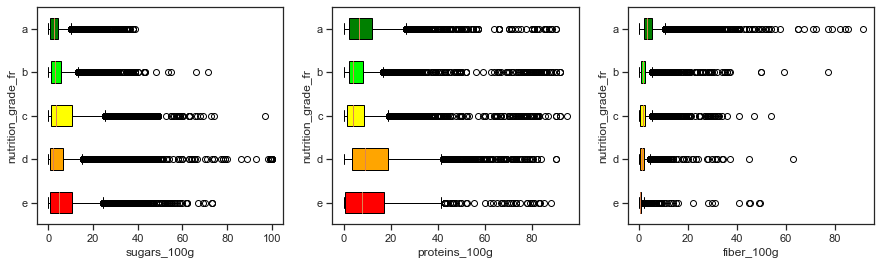

In [15]:
anova("nutrition_grade_fr", ["sugars_100g", "proteins_100g", "fiber_100g"])

In [16]:
def matrice_correlation(features, data=df):
    X = []
    for f in features:
        X.append(data[f].values)
    
    Mx = np.corrcoef(X)

    mask = np.zeros_like(Mx)
    n = mask.shape[0]
    for i in range(0, n):
        for j in range(0, n):
            if j > i:
                mask[i, j] = True 
            
    with sns.axes_style("white"):
        ax = sns.heatmap(Mx, vmin=0, vmax=1, linewidths=.5,mask=mask, square=True, xticklabels=features, yticklabels=features)

In [17]:
feats_sugars = ['sugars_100g', '-sucrose_100g', '-glucose_100g', '-fructose_100g',
                '-lactose_100g', '-maltose_100g', '-maltodextrins_100g']

feats_saturated_fat = ['saturated-fat_100g', '-butyric-acid_100g', '-caproic-acid_100g', '-caprylic-acid_100g',
                       '-capric-acid_100g', '-lauric-acid_100g', '-myristic-acid_100g', '-palmitic-acid_100g',
                       '-stearic-acid_100g', '-arachidic-acid_100g', '-behenic-acid_100g', '-lignoceric-acid_100g',
                       '-cerotic-acid_100g', '-montanic-acid_100g', '-melissic-acid_100g']

feats_omega_3_fat = ['omega-3-fat_100g', '-alpha-linolenic-acid_100g', '-eicosapentaenoic-acid_100g',
                     '-docosahexaenoic-acid_100g']

feats_omega_6_fat = ['omega-6-fat_100g', '-linoleic-acid_100g', '-arachidonic-acid_100g', '-gamma-linolenic-acid_100g',
                     '-dihomo-gamma-linolenic-acid_100g']

feats_omega_9_fat = ['omega-9-fat_100g', '-oleic-acid_100g', '-elaidic-acid_100g', '-gondoic-acid_100g', '-mead-acid_100g',
                     '-erucic-acid_100g', '-nervonic-acid_100g']

In [18]:
#Rammener à 100 les variables concernées
def check_100(val):
    if(val > 100):
        return 100
    return val

def great_to_100(features, data=df):
    for f in features:
        data[f] = data[f].apply(check_100)

#Selectionner les variables se terminant par _100g
def endswith_100g(data = df):
    features_100g = []
    for f in data.columns:
        if f.endswith('_100g'):
            features_100g.append(f)
    return features_100g

def miss_by_0(features, data=df):
    for f in features:
        data[f].fillna(0, inplace=True)

dc = pd.read_csv("en.openfoodfacts.org.products.csv", delimiter="\t", error_bad_lines=False)
        
feats_100g = endswith_100g(dc)

miss_by_0(feats_100g, dc)

great_to_100(feats_100g, dc)

C:\Users\namat\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (0,24,25,26,28,44,49) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


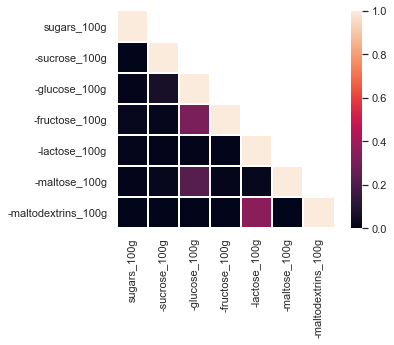

In [19]:
matrice_correlation(feats_sugars, dc)

C:\Users\namat\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\Users\namat\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


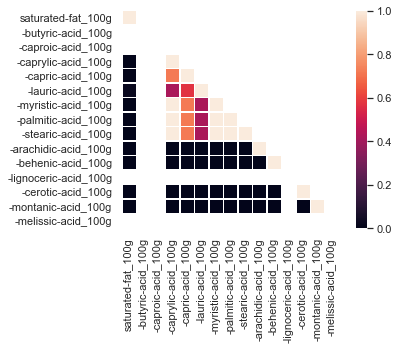

In [20]:
matrice_correlation(feats_saturated_fat, dc)

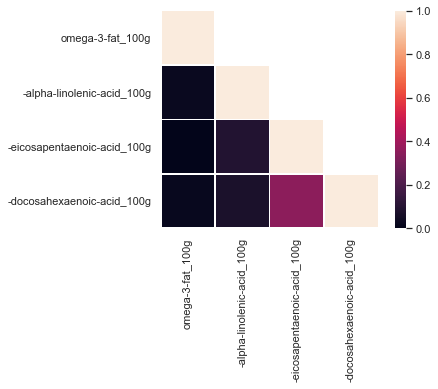

In [21]:
matrice_correlation(feats_omega_3_fat, dc)

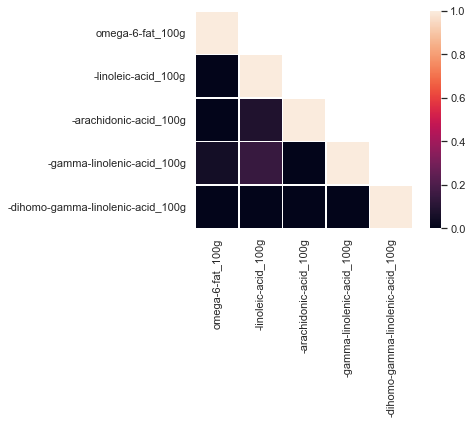

In [22]:
matrice_correlation(feats_omega_6_fat, dc)

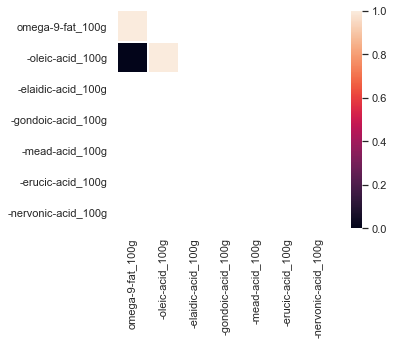

In [23]:
matrice_correlation(feats_omega_9_fat, dc)

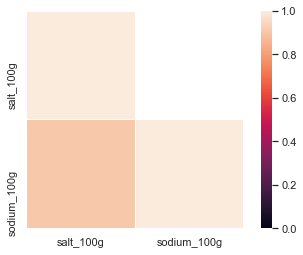

In [24]:
matrice_correlation(["salt_100g", "sodium_100g"], dc)

In [25]:
#renvoyer une liste de valeurs supposées aberantes
def list_sup_aberante(feature, data=df):
    q = df[feature].quantile([0.25,0.5,0.75])
    IQ = q[0.75] - q[0.25]
    liste = []
    for i, row in data.iterrows():
        if (data.loc[i,feature] < (q[0.25] - 1.5*IQ)) or (data.loc[i,feature] > (q[0.75] + 1.5*IQ)):
            liste.append(data.loc[i,feature])
    return sorted(set(liste))

In [26]:
def calculate_critical_value(size, alpha):
    t_dist = stats.t.ppf(1 - alpha / (2 * size), size - 2)
    numerateur = (size - 1) * np.sqrt(np.square(t_dist))
    denominateur = np.sqrt(size) * np.sqrt(size - 2 + np.square(t_dist))
    critical_value = numerateur / denominateur
    print("La valeur critique de Grubb : {}". format(critical_value))
    return critical_value

In [27]:
#Test de Grubb pour confirmer la valeur min anormale
def test_grubb(feature, data=df, confiance = 0.05):
    obs = []
    liste = list_sup_aberante(feature, data)
    size = len(data)
    Gcritical_value = calculate_critical_value(size, confiance)
    obs = list(data[feature].values)
    obs.sort()
    mean = np.mean(obs)
    s = np.std(obs)
    val = 0
    for i in range(0, len(liste)):
        abs_val = abs(liste[i] - mean)
        Gcalculated = abs_val / s
        if Gcalculated > Gcritical_value:
            print("la valeur minimale abérrante : {}".format(liste[i]))
            val = liste[i]
            break
    #data.drop(data[data[feature] >= val].index, inplace=True)
    for i, row in data.iterrows():
        if data.loc[i,feature] > val:
            data.loc[i,feature] = mean#imputation par la moyenne
    return val

In [28]:
test_grubb("fat_100g")#doit le faire pour toutes les variables quantitatives avant d'exporter

La valeur critique de Grubb : 5.389673250372405
la valeur minimale abérrante : 70.3703703703703


70.3703703703703

In [29]:
df.to_csv("analyse.csv", sep="\t", index=False)